In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset

In [39]:
datasetFaces = []

for i in range(1, 41):
    contents = os.listdir('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(i))
    for image_file in contents:
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image = cv2.imread('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(i)+'/'+image_file, cv2.COLOR_BGR2GRAY)
            datasetFaces.append(image)
            
datasetFaces = np.array(datasetFaces)

print('Jumlah total dataset:', len(datasetFaces))
print('Ukuran dataset:', datasetFaces.shape)

# Perubahan dimensi citra
datasetFacesD = datasetFaces.reshape(datasetFaces.shape[0], datasetFaces.shape[1]*datasetFaces.shape[2])
print('Dimensi data:', datasetFacesD.shape)

# representasi dataset menggunakan pandas
df = pd.DataFrame(datasetFacesD)
df

Jumlah total dataset: 400
Ukuran dataset: (400, 112, 92)
Dimensi data: (400, 10304)


,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,49,39,31,29,31,31,33,36,44,61,...,43,43,40,36,33,32,42,41,39,37
1,41,40,41,42,43,43,40,38,31,38,...,40,37,36,39,41,39,45,44,43,43
2,37,46,49,43,44,52,56,52,62,48,...,24,35,36,36,33,35,38,38,38,37
3,34,29,30,36,39,38,41,48,53,58,...,41,40,38,35,32,29,38,37,36,35
4,39,63,24,64,81,78,69,46,57,35,...,168,166,164,161,157,154,155,159,146,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,125,123,122,123,125,126,125,123,125,125,...,35,36,38,39,38,37,38,39,40,41
396,130,126,121,121,124,126,127,126,123,125,...,35,36,37,36,36,35,36,36,37,38
397,127,127,127,128,128,129,129,129,127,126,...,88,88,90,90,89,88,87,87,87,86
398,123,122,121,122,124,125,124,123,121,121,...,35,34,34,35,36,37,40,40,40,39


### Visualisasi Dataset

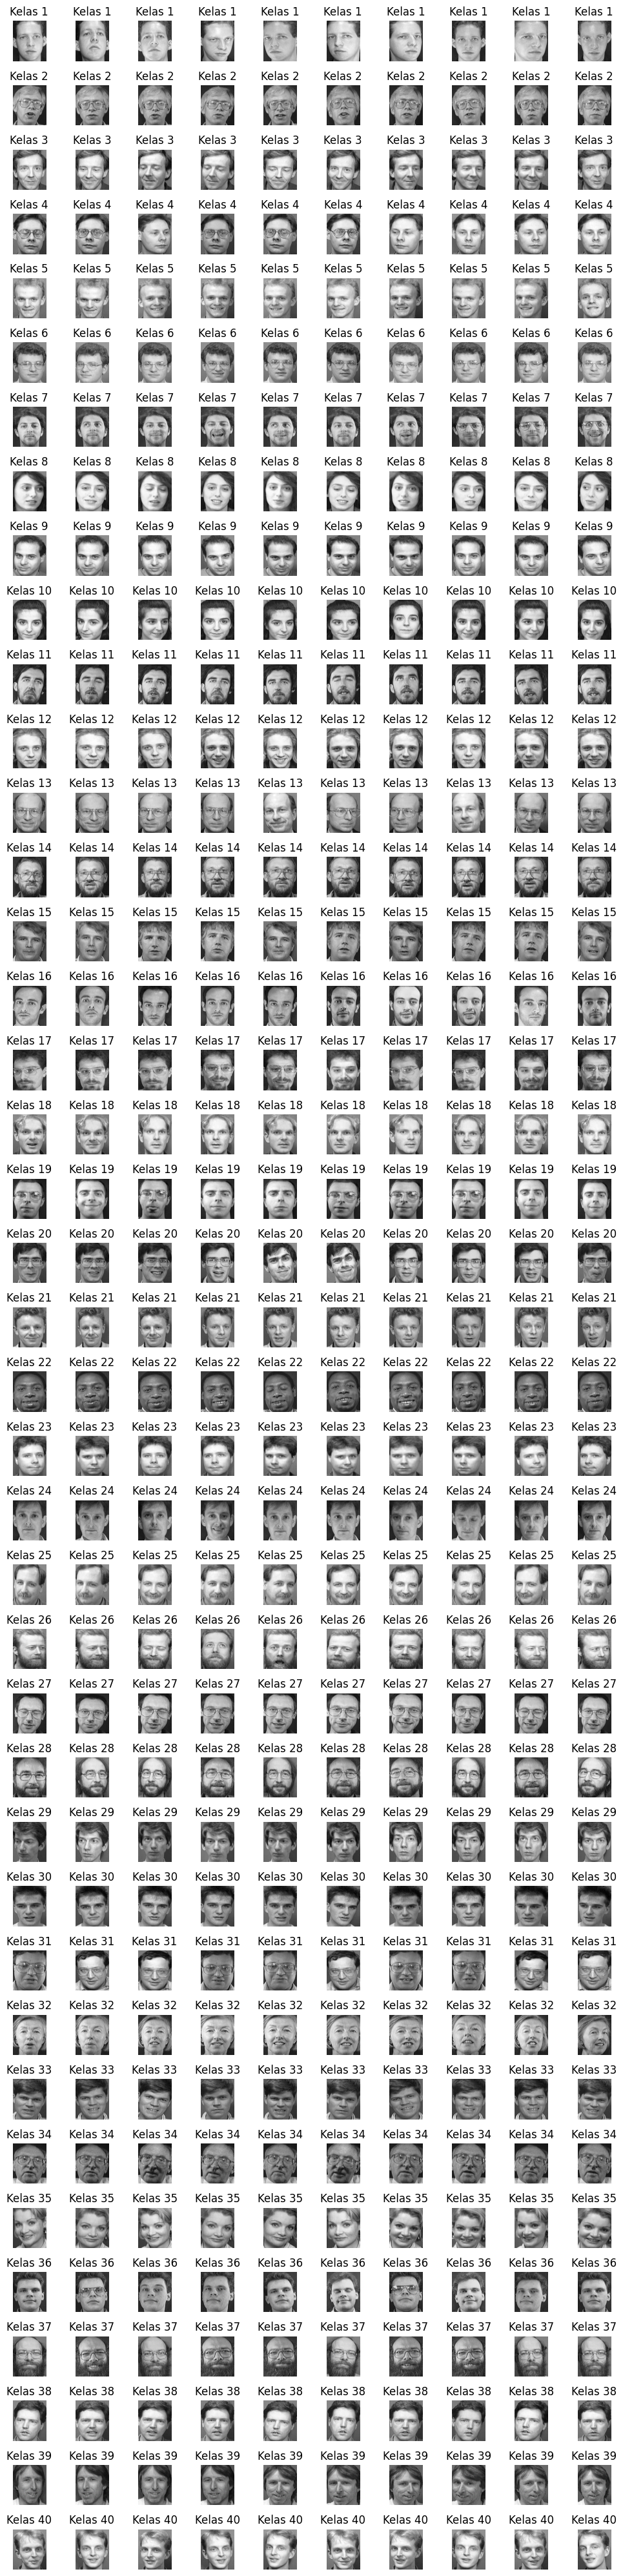

In [3]:
fig, ax = plt.subplots(40, 10, figsize=(10, 40))
for i in range(40):
    for j in range(10):
        ax[i, j].imshow(datasetFaces[i*10+j], cmap='gray')
        ax[i, j].set_title('Kelas '+str(i+1))
        ax[i, j].axis('off')
        
plt.tight_layout()
plt.show()

# Ekstraksi Fitur menggunakan PCA

### Pemisahan Citra Training dan Testing

In [4]:
numOfTrain = 0.6    #60%

# Split data training dan data testing
train = datasetFacesD[:int(len(datasetFacesD) * numOfTrain)]
test = datasetFacesD[int(len(datasetFacesD) * numOfTrain):]

print("Train: ", train.shape) # Jumlah train setelah di split
print("Test: ", test.shape) # Jumlah test setelah di split


Train:  (240, 10304)
Test:  (160, 10304)


### Cari Mean

In [5]:
mean = np.mean(train, axis=0) # axis=0 akan menghitung rata-rata untuk setiap kolom dalam array
print("Mean: ", mean.shape)

dfMean = pd.DataFrame(mean)
dfMean

Mean:  (10304,)


,0
0,87.466667
1,87.629167
2,87.616667
3,87.845833
4,87.887500
...,...
10299,66.554167
10300,68.841667
10301,68.962500
10302,67.220833


### Cari Zero Mean

In [6]:
zeroMean = train - mean
print("ZeroMean: ", zeroMean.shape)

dfZeroMean = pd.DataFrame(zeroMean)
dfZeroMean

ZeroMean:  (240, 10304)


,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,-38.466667,-48.629167,-56.616667,-58.845833,-56.8875,-56.929167,-54.9125,-51.7,-43.595833,-26.829167,...,-30.479167,-28.191667,-29.408333,-33.745833,-35.479167,-34.554167,-26.841667,-27.9625,-28.220833,-30.666667
1,-46.466667,-47.629167,-46.616667,-45.845833,-44.8875,-44.929167,-47.9125,-49.7,-56.595833,-49.829167,...,-33.479167,-34.191667,-33.408333,-30.745833,-27.479167,-27.554167,-23.841667,-24.9625,-24.220833,-24.666667
2,-50.466667,-41.629167,-38.616667,-44.845833,-43.8875,-35.929167,-31.9125,-35.7,-25.595833,-39.829167,...,-49.479167,-36.191667,-33.408333,-33.745833,-35.479167,-31.554167,-30.841667,-30.9625,-29.220833,-30.666667
3,-53.466667,-58.629167,-57.616667,-51.845833,-48.8875,-49.929167,-46.9125,-39.7,-34.595833,-29.829167,...,-32.479167,-31.191667,-31.408333,-34.745833,-36.479167,-37.554167,-30.841667,-31.9625,-31.220833,-32.666667
4,-48.466667,-24.629167,-63.616667,-23.845833,-6.8875,-9.929167,-18.9125,-41.7,-30.595833,-52.829167,...,94.520833,94.808333,94.591667,91.254167,88.520833,87.445833,86.158333,90.0375,78.779167,106.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-51.466667,-50.629167,-48.616667,-47.845833,-47.8875,-48.929167,-50.9125,-52.7,-52.595833,-51.829167,...,125.520833,61.808333,115.591667,143.254167,132.520833,98.445833,-32.841667,-27.9625,-21.220833,-19.666667
236,-50.466667,-51.629167,-51.616667,-50.845833,-51.8875,-53.929167,-57.9125,-61.7,-61.595833,-59.829167,...,87.520833,67.808333,123.591667,156.254167,107.520833,-23.554167,-14.841667,-13.9625,-10.220833,-9.666667
237,-44.466667,-45.629167,-46.616667,-48.845833,-51.8875,-53.929167,-56.9125,-57.7,-54.595833,-52.829167,...,105.520833,137.808333,83.591667,138.254167,151.520833,118.445833,149.158333,-7.9625,-38.220833,-20.666667
238,-50.466667,-52.629167,-52.616667,-50.845833,-47.8875,-47.929167,-50.9125,-53.7,-58.595833,-58.829167,...,146.520833,134.808333,-28.408333,-21.745833,8.520833,-17.554167,-10.841667,-10.9625,-10.220833,-10.666667


### Cari Covariance Matrix

In [7]:
covMatrix = np.dot(zeroMean, zeroMean.T) / train.shape[0]-1
print("Covariance Matrix: ", covMatrix.shape)

dfCovMatrix = pd.DataFrame(covMatrix)
dfCovMatrix

Covariance Matrix:  (240, 240)


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,88067.463643,70382.275206,40323.483609,48856.827723,32536.124911,61943.843261,61804.894286,33027.050935,29789.195987,36390.981369,...,10679.938800,-1506.520523,28113.844129,-8734.553683,4633.556664,5793.540675,9652.917168,-11105.845853,16288.950084,13125.089147
1,70382.275206,108982.086768,52174.311838,50078.255952,41059.728140,72919.263157,74502.418348,23355.258331,41621.757550,27826.042932,...,1529.850362,-11393.908961,23306.493192,-19419.933787,-5753.623440,-4332.481096,2982.399564,-17678.400957,5886.240814,2060.571543
2,40323.483609,52174.311838,70476.528574,23964.460189,48603.836543,50476.379893,44507.135084,33563.891734,42550.165952,36840.105501,...,14426.837932,-920.929725,11978.947428,-1082.137884,4054.130796,669.960640,-2863.500367,-5732.321721,-7113.059117,-7292.353388
3,48856.827723,50078.255952,23964.460189,75220.312636,20008.413991,42554.199008,59363.441699,20671.081682,39471.151734,28246.932949,...,-951.913787,-6892.206443,10373.524876,-18284.577103,-3912.412589,-3330.320246,-1895.043752,-9879.281773,3579.851664,583.082393
4,32536.124911,41059.728140,48603.836543,20008.413991,93186.627845,77459.508695,45836.426386,25688.449702,44988.844754,34729.692636,...,10524.216734,-959.171756,4067.651230,-10219.354916,1014.701265,-1109.439725,1047.632602,-1982.172086,-9703.892815,-10087.712086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,5793.540675,-4332.481096,669.960640,-3330.320246,-1109.439725,-2345.721374,-10354.428683,11452.119633,-11430.672815,3201.858400,...,33993.903331,40448.019008,29320.837827,30536.602515,38031.083695,50336.246873,34023.673366,36452.443678,40016.077116,36638.595345
236,9652.917168,2982.399564,-2863.500367,-1895.043752,1047.632602,11103.325952,-10179.989690,3669.004459,-26196.262989,-8244.506773,...,33947.450657,35204.324668,44254.930987,11922.874841,30030.164355,34023.673366,68497.783192,32639.916004,52574.107775,49586.930171
237,-11105.845853,-17678.400957,-5732.321721,-9879.281773,-1982.172086,-9772.162068,-19639.702711,7916.895605,-10341.080176,1318.221873,...,31457.308470,46051.524147,20561.438800,24799.332654,33123.163834,36452.443678,32639.916004,57698.277984,32287.794754,32628.183817
238,16288.950084,5886.240814,-7113.059117,3579.851664,-9703.892815,3914.171369,-11607.869273,2037.949876,-28811.417572,-13860.844690,...,31130.321074,35452.911751,51441.930570,15122.857758,36456.563939,40016.077116,52574.107775,32287.794754,72396.019859,56279.804754


### Cari Eigenvectors dan Eigenvalues

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)

print("Eigenvalues: ", eigenvalues.shape)
dfEigenvalues = pd.DataFrame(eigenvalues)
dfEigenvalues

Eigenvalues:  (240,)


,0
0,2.613710e+06
1,2.133099e+06
2,1.112519e+06
3,1.007199e+06
4,7.699580e+05
...,...
235,6.534699e+03
236,6.675213e+03
237,6.739574e+03
238,6.736862e+03


In [9]:
print("Eigenvectors: ", eigenvectors.shape)
dfEigenvectors = pd.DataFrame(eigenvectors)
dfEigenvectors

Eigenvectors:  (240, 240)


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.101467,0.033369,-0.155219,0.039719,-0.018241,-0.061204,0.007013,0.032146,0.004721,0.107418,...,-0.021689,-0.081557,0.001048,0.044608,-0.016709,0.029377,-0.025172,0.026342,0.023218,-0.000371
1,0.092572,0.081497,-0.139086,0.063025,0.032243,-0.067823,0.069686,0.015990,-0.075765,0.103858,...,0.079602,0.071260,0.046487,-0.033016,-0.006619,-0.011483,0.007518,-0.015484,-0.032651,0.005494
2,0.086105,0.051377,-0.074777,-0.055092,0.082368,0.010355,-0.026417,0.031063,-0.009767,0.082871,...,-0.143208,-0.047587,-0.091643,0.026352,0.003943,0.116544,-0.007076,0.041976,0.038744,-0.028107
3,0.082729,0.056174,-0.119294,0.024723,-0.036877,-0.038575,0.022838,-0.048268,0.076916,-0.000068,...,-0.018154,-0.051675,0.001762,0.003292,0.047225,0.097213,-0.047939,-0.040058,-0.046686,0.024527
4,0.088409,0.089242,-0.042917,-0.000187,0.111533,0.032675,-0.117388,0.005425,-0.070054,0.045251,...,0.047794,0.060959,-0.023975,0.058831,-0.024726,0.122522,0.091163,-0.005746,0.032502,0.002764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.037734,-0.034049,-0.108270,-0.015032,0.072952,0.020593,-0.100695,0.042054,0.080041,0.017235,...,0.178858,0.049002,-0.095920,-0.057582,0.095959,0.106356,-0.040318,-0.114779,-0.037073,-0.005071
236,-0.055044,-0.030834,-0.119468,0.052894,0.051804,0.012995,-0.177734,0.037121,-0.004806,0.140171,...,-0.023980,-0.024204,-0.020771,0.017839,0.023468,0.079831,-0.087069,-0.047384,0.091589,-0.091546
237,-0.058785,-0.027815,-0.070351,-0.009785,0.114079,0.031135,-0.111749,-0.034088,0.080382,-0.008428,...,0.039412,0.063284,0.031568,-0.050388,-0.074788,0.082372,-0.009215,0.037115,0.055270,0.037923
238,-0.059774,-0.040387,-0.155956,0.079208,0.016219,0.009620,-0.131083,0.045274,0.045635,0.059017,...,0.061464,-0.039083,0.078343,0.052682,0.009568,0.013078,0.046610,0.100027,0.003426,-0.006808


### Mengurutkan nilai Eigenvalues dan Eigenvectors

In [10]:
indeks = eigenvalues.argsort()[::-1] #np.argsort untuk mendapatkan indeks yang mengurutkan eigenvalues secara menurun

# Mengurutkan eigenvalues dan eigenvectors berdasarkan indeks yang telah diurutkan
eigenvalues = eigenvalues[indeks]
eigenvectors = eigenvectors[:, indeks]

# eigenvalues berisi eigenvalues yang diurutkan secara menurun
# eigenvectors berisi eigenvectors yang sesuai dengan eigenvalues yang diurutkan

In [11]:
dfEigenvalues = pd.DataFrame(eigenvalues)
dfEigenvalues

,0
0,2.613710e+06
1,2.133099e+06
2,1.112519e+06
3,1.007199e+06
4,7.699580e+05
...,...
235,2.487533e+03
236,2.330350e+03
237,2.264466e+03
238,1.982172e+03


In [12]:
dfEigenvectors = pd.DataFrame(eigenvectors)
dfEigenvectors

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.101467,0.033369,-0.155219,0.039719,-0.018241,-0.061204,0.007013,0.032146,0.004721,0.107418,...,0.020837,-0.005512,-0.009877,-0.018103,-0.013567,-0.000522,0.034660,-0.004205,-0.030147,0.06455
1,0.092572,0.081497,-0.139086,0.063025,0.032243,-0.067823,0.069686,0.015990,-0.075765,0.103858,...,-0.016217,0.011649,-0.022938,0.034037,-0.000882,0.026194,-0.001976,-0.009817,0.022349,0.06455
2,0.086105,0.051377,-0.074777,-0.055092,0.082368,0.010355,-0.026417,0.031063,-0.009767,0.082871,...,-0.043972,-0.036734,0.035480,-0.039884,-0.000374,-0.015975,-0.021255,0.008190,-0.007083,0.06455
3,0.082729,0.056174,-0.119294,0.024723,-0.036877,-0.038575,0.022838,-0.048268,0.076916,-0.000068,...,-0.019510,-0.033041,0.039263,-0.028037,0.068503,0.013583,-0.006294,-0.025399,0.008088,0.06455
4,0.088409,0.089242,-0.042917,-0.000187,0.111533,0.032675,-0.117388,0.005425,-0.070054,0.045251,...,0.012612,-0.028091,0.009169,-0.022065,-0.002269,0.000934,0.008339,-0.001749,0.018274,0.06455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.037734,-0.034049,-0.108270,-0.015032,0.072952,0.020593,-0.100695,0.042054,0.080041,0.017235,...,0.003748,-0.039573,0.038603,0.014392,-0.018682,0.009248,-0.036582,-0.025075,-0.005691,0.06455
236,-0.055044,-0.030834,-0.119468,0.052894,0.051804,0.012995,-0.177734,0.037121,-0.004806,0.140171,...,-0.018191,0.040132,-0.028212,-0.034840,0.059566,-0.039513,-0.005458,-0.024120,-0.026447,0.06455
237,-0.058785,-0.027815,-0.070351,-0.009785,0.114079,0.031135,-0.111749,-0.034088,0.080382,-0.008428,...,-0.030967,0.003447,-0.000651,0.019023,0.043399,0.000712,0.003963,-0.012632,-0.001219,0.06455
238,-0.059774,-0.040387,-0.155956,0.079208,0.016219,0.009620,-0.131083,0.045274,0.045635,0.059017,...,-0.038512,-0.025364,-0.024124,-0.013312,-0.033510,-0.002214,-0.011042,0.009553,-0.023165,0.06455


### Cari Proyeksi Matrix

In [13]:
proyeksiMatrix = np.dot(zeroMean.T, eigenvectors).T
print("Proyeksi Matrix: ", proyeksiMatrix.shape)

dfProyeksiMatrix = pd.DataFrame(proyeksiMatrix)
dfProyeksiMatrix

Proyeksi Matrix:  (240, 10304)


,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,-1.599997e+02,-1.579545e+02,-1.608466e+02,-162.530151,-1.619023e+02,-1.586301e+02,-1.541236e+02,-1.558374e+02,-1.527771e+02,-1.612234e+02,...,-6.376114e+01,-7.191729e+01,-1.088811e+02,-1.264959e+02,-1.454113e+02,-1.167391e+02,-6.885365e+01,-6.584717e+01,-6.049679e+01,-9.215259e+01
1,3.562522e+02,3.566034e+02,3.511706e+02,353.719798,3.570217e+02,3.580891e+02,3.582497e+02,3.564492e+02,3.583238e+02,3.543908e+02,...,-7.777471e+01,-4.295175e+01,-3.100203e+01,-5.228300e+01,-4.776802e+01,-2.442048e+01,-9.721619e+01,-1.336655e+02,-9.556251e+01,-8.595154e+01
2,3.172395e+02,3.167778e+02,3.197516e+02,320.574977,3.182279e+02,3.190334e+02,3.215056e+02,3.255261e+02,3.210217e+02,3.143651e+02,...,-1.111718e+02,-4.355860e+01,-5.047644e+00,-1.765748e+01,-2.213388e+01,2.299399e+01,6.227167e+01,9.599967e+01,1.070782e+02,1.079094e+02
3,1.552649e+00,-2.873070e-01,-2.561082e+00,-2.449077,-2.845091e+00,2.168690e+00,5.785915e+00,9.520066e+00,2.669179e+00,1.276866e+01,...,1.953698e+02,1.764387e+02,1.848724e+02,2.018656e+02,2.135860e+02,1.912853e+02,2.349385e+02,2.447023e+02,2.239071e+02,2.316192e+02
4,-9.988880e+01,-9.653651e+01,-1.002709e+02,-100.434784,-9.922593e+01,-1.005508e+02,-1.028884e+02,-1.096444e+02,-1.061717e+02,-1.065111e+02,...,2.683149e+02,2.190228e+02,1.859530e+02,1.874453e+02,1.714833e+02,1.426677e+02,1.518869e+02,1.384323e+02,9.456355e+01,1.049627e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-2.069745e+00,-2.093439e+00,-2.444792e+00,-1.401896,-1.168581e-01,6.388264e-02,-1.274708e+00,-8.997239e-01,1.887127e+00,4.540875e+00,...,7.347934e-01,-1.066312e+00,3.162067e+00,1.336488e+01,1.183977e+01,-1.261657e+00,-1.140076e+00,1.483462e+00,5.314166e+00,1.059415e+01
236,3.331569e+00,3.201605e+00,1.142786e+00,1.396958,2.232917e+00,2.555010e+00,3.580753e+00,2.766270e+00,2.386349e+00,3.002164e+00,...,7.234777e+00,1.070447e+01,1.344798e+00,-9.984608e+00,-7.940796e+00,-7.764110e-01,-4.059809e+00,-3.437872e+00,2.787344e+00,4.927748e+00
237,-4.482707e-01,7.039162e-01,9.806732e-01,-0.748119,-1.414799e+00,-2.108995e+00,-1.057078e+00,7.175532e-01,-3.783093e+00,-4.356814e+00,...,7.060476e+00,5.217112e+00,9.720956e-01,1.012732e-01,-1.084124e+01,-6.918173e+00,-4.973158e+00,2.051324e+00,3.741254e+00,3.716416e+00
238,-4.683701e+00,-2.199379e+00,5.241248e-01,2.529568,2.411910e+00,1.132112e+00,4.464960e-01,-1.695249e+00,3.865740e+00,4.659342e+00,...,-8.764883e+00,-1.892354e+01,-1.720271e-01,8.130227e+00,1.703969e-01,-9.778557e+00,-1.550819e+01,-8.404863e-01,4.458688e-01,1.567350e+00


### Cari Bobot Matrix

In [14]:
w = np.dot(train, proyeksiMatrix.T)
print("Bobot: ", w.shape)

dfBobot = pd.DataFrame(w)
dfBobot

Bobot:  (240, 240)


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,1.957921e+08,2.115681e+08,-5.447650e+07,-5.604886e+07,-1.358946e+07,1.178997e+07,1.566366e+07,-1.514742e+07,-1.238866e+07,2.164899e+06,...,53589.420452,-145954.550495,1475.829348,-56971.540190,-27083.082429,-24245.800999,79309.107392,33412.746708,-123402.761009,-1.056630e-08
1,1.902121e+08,2.362069e+08,-5.016868e+07,-5.041511e+07,-4.260469e+06,1.095735e+07,2.274904e+07,-1.670767e+07,-1.949758e+07,1.894862e+06,...,24806.718885,-132823.999320,-7918.152523,-21041.407790,-19272.659562,-8296.118521,58819.206339,30362.426489,-98429.193875,-1.488533e-08
2,1.861556e+08,2.207872e+08,-3.299816e+07,-7.896737e+07,5.002061e+06,2.079196e+07,1.188424e+07,-1.525209e+07,-1.366832e+07,3.027008e+05,...,3247.801891,-169845.056907,34099.662843,-71981.054459,-18959.616697,-33471.228513,48037.133472,40148.995968,-112430.509249,-1.519245e-08
3,1.840377e+08,2.232431e+08,-4.488414e+07,-5.967395e+07,-1.703328e+07,1.463665e+07,1.745275e+07,-2.291294e+07,-6.012092e+06,-5.989143e+06,...,22249.228622,-167019.074481,36820.328625,-63816.766374,23450.780218,-15825.377110,56404.327065,21894.432568,-105213.495771,-1.856423e-08
4,1.876006e+08,2.401719e+08,-2.449139e+07,-6.569538e+07,1.039155e+07,2.359982e+07,1.599576e+06,-1.772786e+07,-1.899314e+07,-2.551169e+06,...,47200.933765,-163232.020174,15174.814446,-59701.388098,-20126.326038,-23376.478407,64588.272572,34747.491021,-100367.660269,-2.224379e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.084721e+08,1.770540e+08,-4.194078e+07,-6.928373e+07,3.262107e+06,2.207986e+07,3.486784e+06,-1.419067e+07,-5.736139e+06,-4.676529e+06,...,40315.409666,-172017.455035,36345.530863,-34578.648176,-30232.644286,-18413.319051,39464.744263,22070.136776,-111768.561369,-1.099830e-08
236,9.761427e+07,1.787001e+08,-4.493079e+07,-5.286415e+07,-6.458133e+05,2.112406e+07,-5.222735e+06,-1.466706e+07,-1.323012e+07,4.649607e+06,...,23274.021436,-111029.248701,-11711.757931,-68505.041831,17948.036355,-47523.598813,56871.891028,22589.483985,-121642.536529,-1.494670e-08
237,9.526749e+07,1.802456e+08,-3.181622e+07,-6.801545e+07,1.086187e+07,2.340608e+07,2.237120e+06,-2.154365e+07,-5.705984e+06,-6.623367e+06,...,13349.698849,-139099.742956,8111.804468,-31387.452874,7992.905513,-23509.074734,62140.687816,28833.022828,-109640.968834,-1.250359e-08
238,9.464685e+07,1.738090e+08,-5.467314e+07,-4.650326e+07,-7.221640e+06,2.069954e+07,5.130508e+04,-1.387970e+07,-8.775026e+06,-1.506848e+06,...,7488.805678,-161144.886235,-8771.069222,-53670.161784,-39362.706665,-25256.301506,53748.698303,40889.531107,-120080.970332,-1.308621e-08


# Klasifikasi menggunakan Manhattan